Корректно отображается тетрадка [тут](https://nbviewer.jupyter.org/github/paantya/gaialib/blob/master/d2018.ipynb).

# Задание #

# %load http://school.podvorye.ru/astro/Ptashin/HIP-TGAS.txt
Сравнение тригонометрических параллаксов звезд TGAS и Hipparcos

1. Дополнение TGAS данными из Hipparocs (параллаксами)

   Каталог получится из 100 000 звезд.

2. Таблицу "рекордсменов" по разностям параллаксом. Первые 50 звезд с самыми большими отличиями.
   Табличку.
   
3. ... на потом
   Построение полных разностей параллаксов по небесной сфере и (возможно) анализ их с помощью сферических функций.
   
   
13-01-2018

Пишем текст дип. работы

1. Описание TGAS (1-2 стр.)
2. Объединение данных XHIP и TGAS, какие данные берем (столбцы)
3. Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше
4. Распределение разностей по неб. сфере (без модуля)
5. Распределение разностей по неб. сфере (модуля) - необязательно
6. Таблица рекордсменов и распределение их по неб. сфере.


- текст по пп. 1-6 прислать

7. Определить МНК первые 36 (от j=0 до j=35) коэффицентов разложения самих разностей по сферическим функциям.

Питон - МНК (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)

# 2018.01.13

### 1. Описание TGAS (1-2 стр.)

**THE TYCHO-GAIA ASTROMETRIC SOLUTION** (**TGAS**) -- работа по дополнению Gaia результатами мисси Tycho-2. для получения параллактов для звед из каталога tycho-2. В дополнеие имеются данные из каталога hip2.  


Позволяет получить субмиллиметровые точности.



### 2.Объединение данных XHIP и TGAS, какие данные берем (столбцы)
ПРи объединении данных двух каталогов, мы брали параллаксы и ошибки параллаксов.
#### **Из Tgas**:
* $parallax$ -- параллах
* $parallax_{error}$ -- ошибка определения параллакса
* $l$ -- долгота в галлактической СК
* $b$ -- широта в галлактической СК
* $hip$ -- `id` звезды в каталоге hipparcos? ждя сведения с каталогом hip2

#### **Из hip2**:
* $parallax$ -- параллакс
* $parallax_{error}$ -- ошибка определения параллакса


### 3.Гистрограмма разностей (без модуля) - будет видно, что параллаксы Hipparcos больше


### 4.Распределение разностей по неб. сфере (без модуля)


### 5.Распределение разностей по неб. сфере (модуля) - необязательно


### 6.Таблица рекордсменов и распределение их по неб. сфере.

### Подключаем библиотеки и модули.

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
Matplotlib version 2.1.2


### Фнкция для отслеживания времени

In [2]:
def times():
    time_format = "%H:%M:%S.%f:" #"%Y.%m.%d-%H:%M:%S.%f:"
    return str(datetime.strftime(datetime.now(), time_format))

### Загружаем Tgas в память

In [3]:
%%time

#!ls ./../../data/astro/tgas/ #Проверка директории на наличие фийлов каталога
!ls ./../../data/astro/tgas/

local_tgas = './../../data/astro/tgas/'
file_tgas = 'TgasSource_000-000-000.csv'
print('{}: Loading file {}..'.format(times(), file_tgas),)
df_tgas = pd.read_csv(local_tgas + file_tgas)
len_file = len(df_tgas)
#print(' len_file = {}'.format(len_file))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file_tgas = 'TgasSource_000-000-'+n+'.csv'
    print('{}: Loading file {}..'.format(times(), file_tgas),)
    df0_tgas = pd.read_csv(local_tgas + file_tgas)
    len_df0 = len(df0_tgas)
    df_tgas = df_tgas.append(df0_tgas)
    len_df = len(df_tgas)
    df0_tgas._clear_item_cache()
    #print(' len_file = {}, len_df = {}'.format(len_df0, len_df))
print('{}: [/] End'.format(times()))

ReadMe.txt		    TgasSource_000-000-007.csv
tgasptyc.dat		    TgasSource_000-000-008.csv
TgasSource_000-000-000.csv  TgasSource_000-000-009.csv
TgasSource_000-000-001.csv  TgasSource_000-000-010.csv
TgasSource_000-000-002.csv  TgasSource_000-000-011.csv
TgasSource_000-000-003.csv  TgasSource_000-000-012.csv
TgasSource_000-000-004.csv  TgasSource_000-000-013.csv
TgasSource_000-000-005.csv  TgasSource_000-000-014.csv
TgasSource_000-000-006.csv  TgasSource_000-000-015.csv
23:46:21.090960:: Loading file TgasSource_000-000-000.csv..
23:46:24.371907:: Loading file TgasSource_000-000-001.csv..
23:46:27.524770:: Loading file TgasSource_000-000-002.csv..
23:46:30.777390:: Loading file TgasSource_000-000-003.csv..
23:46:34.316147:: Loading file TgasSource_000-000-004.csv..
23:46:37.990410:: Loading file TgasSource_000-000-005.csv..
23:46:41.703745:: Loading file TgasSource_000-000-006.csv..
23:46:45.844649:: Loading file TgasSource_000-000-007.csv..
23:46:49.947133:: Loading file TgasSource_000-0

### Загрузим hip2 в память

In [4]:
#%%time

#!ls ./../../data/astro/hip/ #Проверка содержания директории с файлом каталога

local_hip = './../../data/astro/hip/'
file_hip = 'hip2.dat'
name_col = ['hip', #Hipparcos identifier
            'isol_n', #Sol. type new reduction
            'isol_o', #Sol. type old reduction
            'ncomp', #Number of components
            'α', #Right Ascension in ICRS
            'δ', #Declination in ICRS
            'parallax_hip', #Parallax
            'μ_α', #Proper motion in Right Ascension
            'μ_δ', #Proper motion in Declination
            'σ_α', #Formal error on α
            'σ_δ', #Formal error on δ
            'parallax_error_hip', #Formal error on parallax
            'σ_μ_α', #Formal error on μ α
            'σ_μ_δ', #Formal error on μ δ
            'nobs', #Number of field transits used
            'gof', #Goodness of fit
            'prej', #Percentage rejected data
            'var', #Cosmic dispersion added
            'ic', #Entry in one of the suppl.catalogues
            'Hp', #Hp magnitude
            'e_Hp', #Error on mean Hp
            'σ_Hp', #Scatter of Hp
            'VarAnn', #Reference to variability annex
            'V_B', #Colour index
            'σ_V_B', #Formal error on colour index
            'V_I', #Colour index
            'U_1', #Upper-triangular weight matrix
            'U_2', #Upper-triangular weight matrix
            'U_3', #Upper-triangular weight matrix
            'U_4', #Upper-triangular weight matrix
            'U_5', #Upper-triangular weight matrix
            'U_6', #Upper-triangular weight matrix
            'U_7', #Upper-triangular weight matrix
            'U_8', #Upper-triangular weight matrix
            'U_9', #Upper-triangular weight matrix
            'U_10', #Upper-triangular weight matrix
            'U_11', #Upper-triangular weight matrix
            'U_12', #Upper-triangular weight matrix
            'U_13', #Upper-triangular weight matrix
            'U_14', #Upper-triangular weight matrix
            'U_15'  #Upper-triangular weight matrix
           ]
print('{}: [/] Loading file {}..'.format(times(), file_hip), end='')
df_hip = pd.read_csv(local_hip + file_hip,
                     sep="\s+", 
                     #skiprows=1,
                     #usecols=[0,7],
                     names=name_col
                    )
len_file = len(df_hip)
#print(' len_file = {}'.format(len_file))

#df_hip['parallax_hip'].value_counts(dropna=False)

df_hip.info()

23:47:28.024639:: [/] Loading file hip2.dat..<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117955 entries, 0 to 117954
Data columns (total 41 columns):
hip                   117955 non-null int64
isol_n                117955 non-null int64
isol_o                117955 non-null int64
ncomp                 117955 non-null int64
α                     117955 non-null float64
δ                     117955 non-null float64
parallax_hip          117955 non-null float64
μ_α                   117955 non-null float64
μ_δ                   117955 non-null float64
σ_α                   117955 non-null float64
σ_δ                   117955 non-null float64
parallax_error_hip    117955 non-null float64
σ_μ_α                 117955 non-null float64
σ_μ_δ                 117955 non-null float64
nobs                  117955 non-null int64
gof                   117955 non-null float64
prej                  117955 non-null int64
var                   117955 non-null float64
ic                    117955

### Выделим из tgas звезды, которые есть в hip2 (параметр `hip != Nan`)

In [5]:
pd.options.mode.chained_assignment = None #отключаем уведомления о предупрежениях

df_tgas_hip = df_tgas[~df_tgas['hip'].apply(lambda x: np.isnan(x))]; #[['hip','parallax','parallax_error']]
df_tgas_hip['hip'] = df_tgas_hip['hip'].apply(lambda x: int(x));
df_tgas_hip.sort_values(by='hip',inplace=True);

### Выделим **нужные** поля из hip2

In [6]:
hip_split = ['hip','parallax_hip','parallax_error_hip','ncomp', 'nobs']
df_hip_tgas = df_hip[df_hip["hip"].isin(df_tgas_hip['hip'])][hip_split];

Изменяем индексацию, что бы скрестить два подкаталога вместе. (В дальнейшем `df_tgas_hip` нельзя будет скрещивать с `df_tgas` стандартными функциями `pandas`. Оно нам особо и не нужно будет.)

In [7]:
df_tgas_hip.index = df_hip_tgas.index;

df_tgas_hip['parallax_hip'] = df_hip_tgas['parallax_hip'];
df_tgas_hip['parallax_error_hip'] = df_hip_tgas['parallax_error_hip'];
df_tgas_hip['ncomp'] = df_hip_tgas['ncomp'];
df_tgas_hip['nobs'] = df_hip_tgas['nobs'];

#df_tgas_hip['parallax_relatively_difference'] = np.abs(df_tgas_hip['parallax'] - df_tgas_hip['parallax_hip'])

#df_tgas_hip.head(10)

df_tgas_hip.loc[df_tgas_hip['ra'] > 180,'ra'] = df_tgas_hip[df_tgas_hip['ra'] > 180]['ra'] - 360
df_tgas_hip.loc[df_tgas_hip['l'] > 180,'l'] = df_tgas_hip[df_tgas_hip['l'] > 180]['l'] - 360
df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180,'ecl_lon'] = df_tgas_hip[df_tgas_hip['ecl_lon'] > 180]['ecl_lon'] - 360

#### Замечание

Мы получили 93635 звезд включённых в tgas, вместо 117954 ожидаемых.

90283 - пригодны для исследования, т.к. они удовлетворяют следующим параметрам 
$$parallax > 0$$ 
$$parallax_{hip} > 0$$ 
$$parallax \neq Nan $$
$$parallax_{hip} \neq Nan $$


## 2 Посчитаем разности параллаксов ##

Разности будем считать только для положительных значений параллаксов.

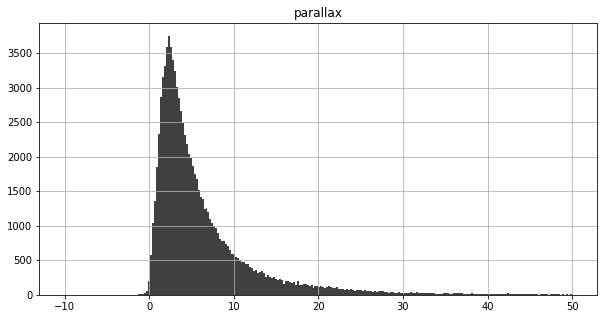

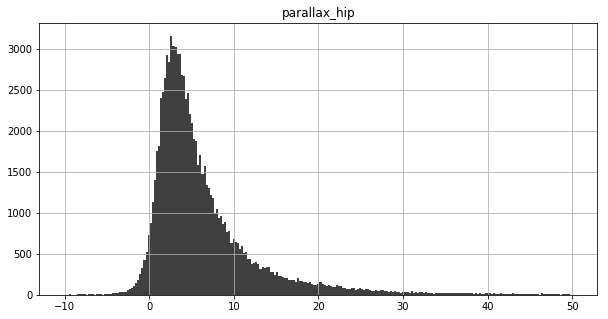

,parallax_hip,parallax_error_hip,parallax_difference,parallax_difference_qrt,nobs
count,93635.000000,93635.000000,90283.000000,90283.000000,93635.000000
mean,6.716317,1.098058,0.213103,4.270194,117.493384
std,8.682223,0.982716,1.712709,76.974273,42.979748
min,-118.140000,0.090000,-42.350255,-10785.350187,20.000000
25%,2.470000,0.690000,-0.614582,-4.425292,86.000000
50%,4.490000,0.920000,0.140436,0.916003,113.000000
75%,8.110000,1.230000,0.934272,8.856814,140.000000
max,298.040000,47.480000,90.056481,8761.011377,388.000000


In [15]:
srez = (df_tgas_hip['parallax'] > 0) & (df_tgas_hip['parallax_hip'] > 0 & ~df_tgas_hip['parallax'].apply(lambda x: np.isnan(x)) & ~df_tgas_hip['parallax_hip'].apply(lambda x: np.isnan(x)))

df_tgas_hip['parallax_difference_qrt'] = np.power(df_tgas_hip[srez]['parallax_hip'],2) - np.power(df_tgas_hip[srez]['parallax'],2);
df_tgas_hip['parallax_difference'] = df_tgas_hip[srez]['parallax_hip'] - df_tgas_hip[srez]['parallax'];
df_tgas_hip['parallax_difference_abs'] = df_tgas_hip[srez]['parallax_difference'].apply(lambda x: np.abs(x));
df_tgas_hip['parallax_difference_abs_qrt'] = df_tgas_hip[srez]['parallax_difference_qrt'].apply(lambda x: np.abs(x));
df_tgas_hip['parallax_error_hip_tgas'] = np.sqrt(np.power(df_tgas_hip['parallax_error'],2) + np.power(df_tgas_hip['parallax_error_hip'],2))

['parallax','parallax_error','parallax_hip','parallax_error_hip','parallax_difference','parallax_difference_abs',
     'parallax_error_hip_tgas']
df_tgas_hip[['parallax']].hist(bins='fd',range=(-10,50), color='k', alpha=0.75,  figsize = (10,5))
df_tgas_hip[['parallax_hip']].hist(bins='fd',range=(-10,50), color='k', alpha=0.75,  figsize = (10,5))

plt.show()

df_tgas_hip[['parallax_hip','parallax_error_hip','parallax_difference','parallax_difference_qrt','nobs']].describe()

Гистаграмма разностей параклаксов

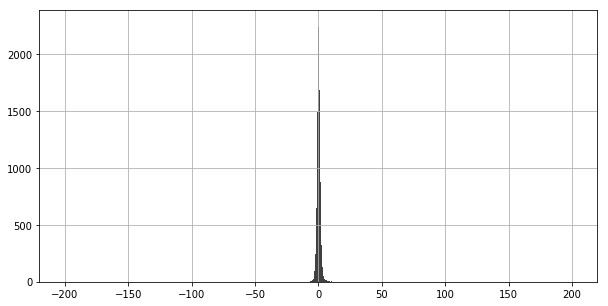

In [16]:
df_tgas_hip[srez].to_csv('df_tgas_hip_srez.csv')
df_tgas_hip['parallax_difference'].hist(bins='fd',range=(-200,200), color='k', alpha=0.75,  figsize = (10,5)); #fd

Выделим таблицу "*рекордсменов*" в порядке убывания по разности параллаксов.

23:48:00.775258:: Begin plot_hex_hammer paralax ra, dec, 70.
23:48:01.480713:: End plot_hammer paralax.


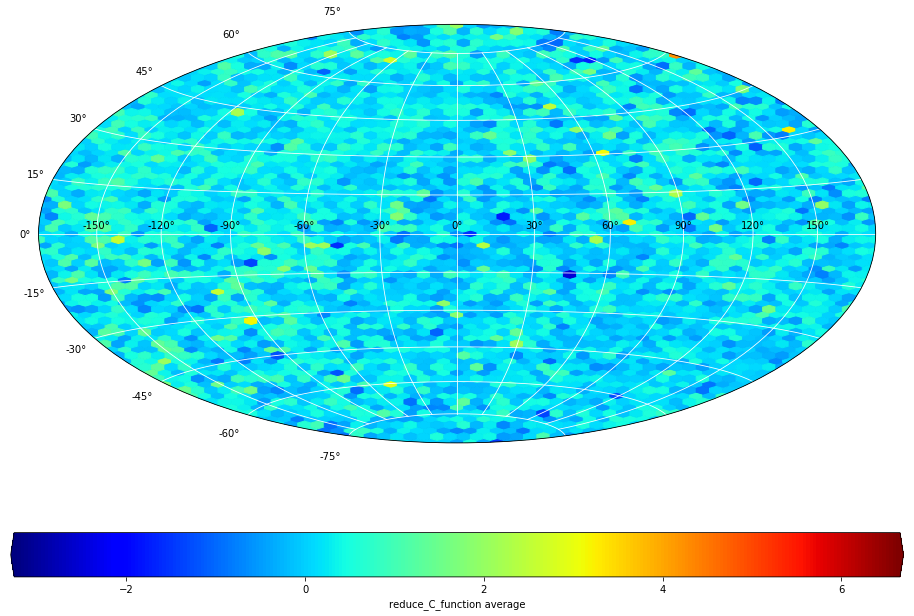

23:48:03.925504:: Begin plot_hex_hammer paralax l, b, 70.
23:48:04.312639:: End plot_hammer paralax.


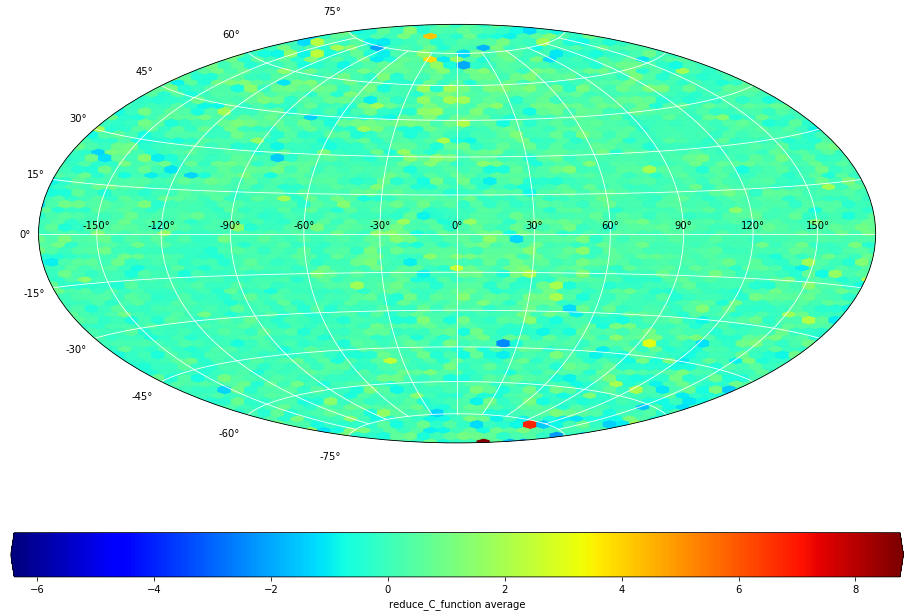

23:48:06.770171:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
23:48:07.111630:: End plot_hammer paralax.


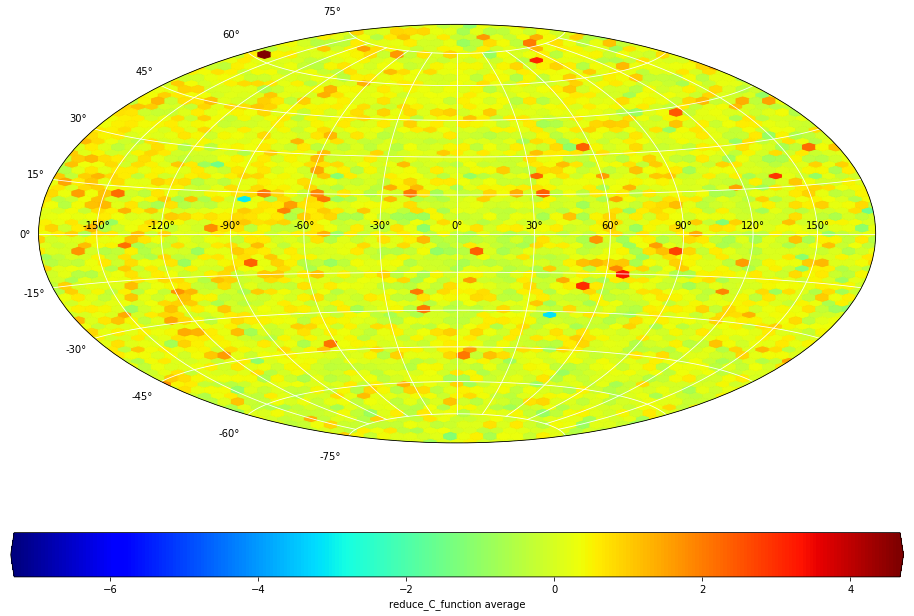

CPU times: user 8.6 s, sys: 36 ms, total: 8.64 s
Wall time: 8.75 s


In [10]:
%%time

def hexbinmy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('k')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        C = df0[c],
        gridsize=gridsize,
        cmap='jet',#'bwr',#'seismic', #'inferno',
        mincnt=0,
        reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    

    cmap = mpl.cm.cool
    cb = plt.colorbar(h, ax=ax,cmap=cmap,               
                      #norm=norm,
                      #boundaries=bounds,
                      extend='both',
                      extendfrac='auto',
                      #ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                     )
    cb.set_label('reduce_C_function '+str(fun_red.__code__).split()[2])
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.tight_layout()
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='w')#, linestyle='--', linewidth=1.9)
    plt.show()

hexbinmy(df_tgas_hip,'ra','dec','parallax_difference',70)    
hexbinmy(df_tgas_hip,'l','b','parallax_difference',70)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference',70)

23:48:09.530286:: Begin plot_hex_hammer paralax ra, dec, 70.
23:48:09.884173:: End plot_hammer paralax.


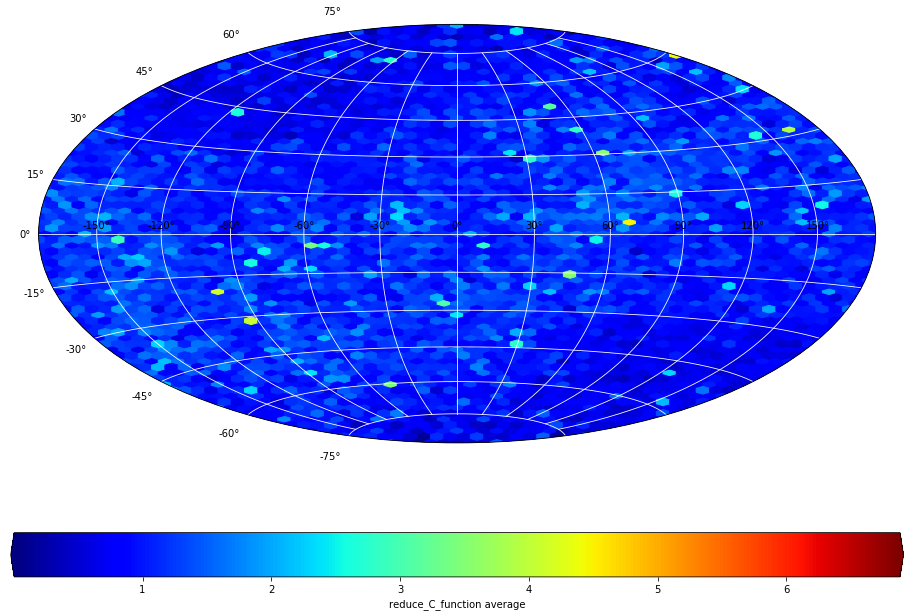

23:48:12.358154:: Begin plot_hex_hammer paralax l, b, 70.
23:48:12.708764:: End plot_hammer paralax.


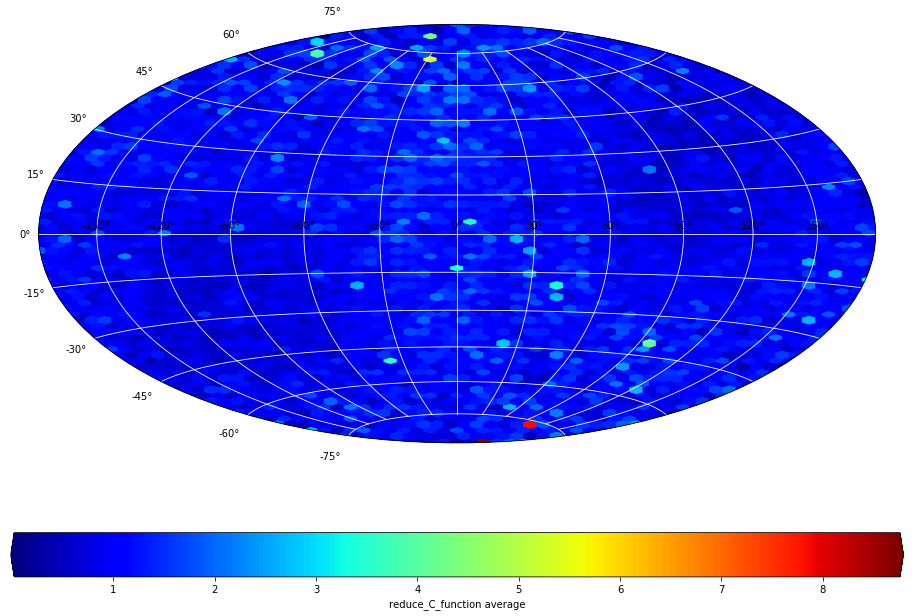

23:48:15.102855:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 70.
23:48:15.495837:: End plot_hammer paralax.


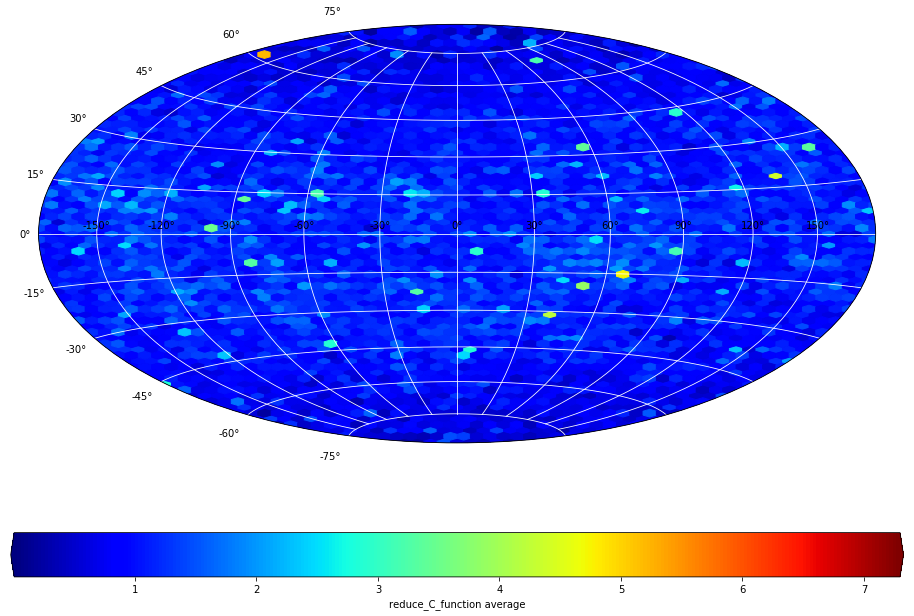

In [11]:
hexbinmy(df_tgas_hip,'ra', 'dec','parallax_difference_abs',70)
hexbinmy(df_tgas_hip,'l', 'b','parallax_difference_abs',70)
hexbinmy(df_tgas_hip,'ecl_lon', 'ecl_lat','parallax_difference_abs',70)

In [12]:
tmp = df_tgas_hip[['ra','dec','ecl_lon', 'ecl_lat','l','b','parallax_difference','parallax_difference_abs']].sort_values(by='parallax_difference_abs', ascending=False).head(75)
df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(75);

23:48:18.338405:: Begin plot_hex_hammer paralax ra, dec, 75.
23:48:18.342004:: End plot_hammer paralax.


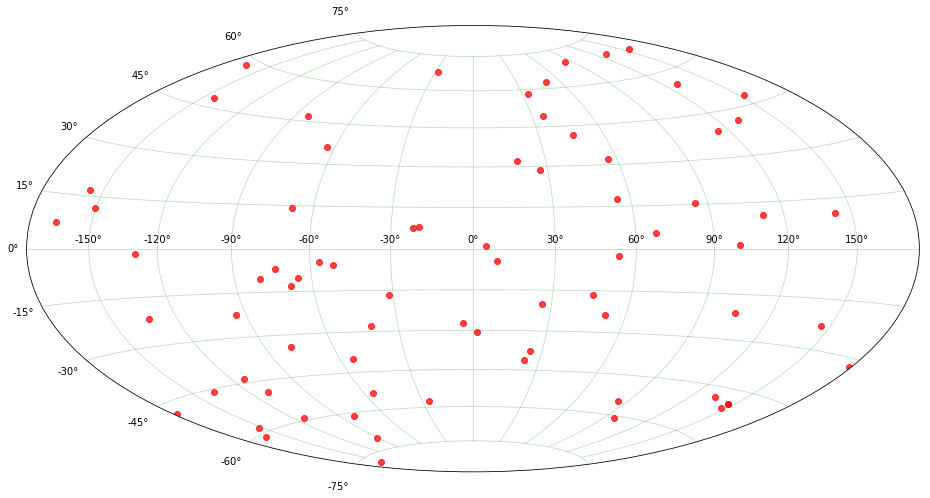

23:48:18.752431:: Begin plot_hex_hammer paralax l, b, 75.
23:48:18.755174:: End plot_hammer paralax.


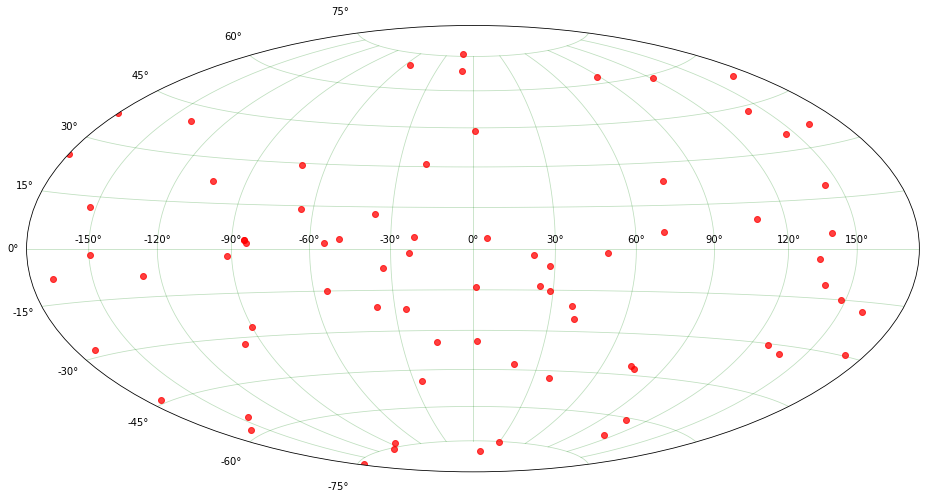

23:48:19.166681:: Begin plot_hex_hammer paralax ecl_lon, ecl_lat, 75.
23:48:19.170291:: End plot_hammer paralax.


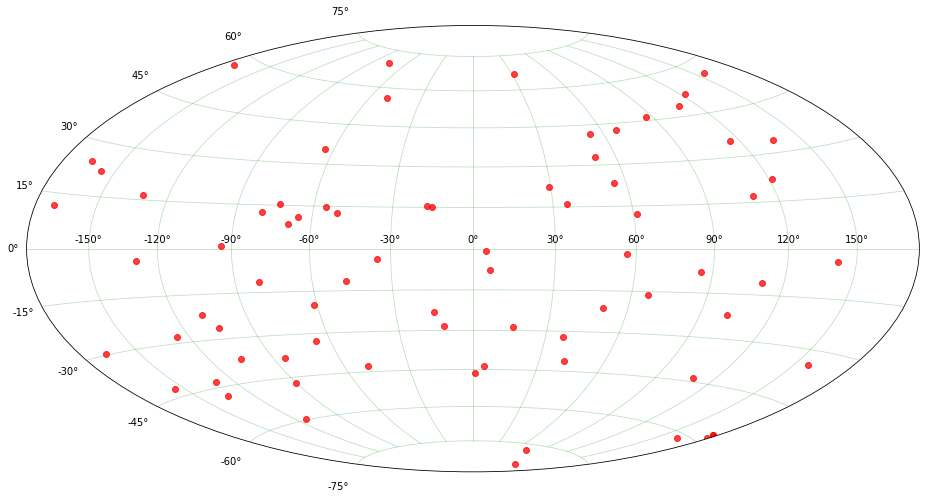

CPU times: user 1.26 s, sys: 0 ns, total: 1.26 s
Wall time: 1.25 s


In [13]:
%%time

def scattermy(df0,x,y,c,gridsize=50,fun_red=np.average):
    import matplotlib as mpl
    plt.figure(figsize=(16,11))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.plot(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180, 'ro', alpha=.75
        #s = 1,
        #c = df0[c],
        #gridsize=gridsize,
        #cmap='seismic',#'gray',#'bwr',#'seismic', #'inferno',
        #mincnt=0,
        #reduce_C_function=fun_red,
        
        #bins='log',
        #marginals = True,
        #vmax=10,
        #s = 1.05,
        #marker="o",
        #color = 1/(df0.max - df0.min) *(df0[c] - df0.min),
        #linewidths=2.01,
        #label = '20-40 ra'
    )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    #plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.grid(color='g',alpha = .25)#, linestyle='--', linewidth=1.9)
    plt.show()

scattermy(tmp,'ra','dec','parallax_difference',75)    
scattermy(tmp,'l','b','parallax_difference_abs',75)
scattermy(tmp,'ecl_lon', 'ecl_lat','parallax_difference',75)
  